In [1]:
import seaborn as sns
import pandas as pd

In [2]:
df = pd.read_csv('train_values.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (21) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
values = pd.read_csv('train_labels.csv')

In [4]:
df.shape

(157031, 22)

In [5]:
df = df.merge(values).drop('row_id', axis=1)

In [6]:
df

,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,applicant_race,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,co_applicant,accepted
0,3,1,1,1,70.0,3,18,37,246,2,5,1,24.0,6203.0,44.230,60588.0,50.933,716.0,2642.0,4536,False,1
1,1,1,3,1,178.0,3,369,52,299,1,5,1,57.0,5774.0,15.905,54821.0,100.000,1622.0,2108.0,2458,False,0
2,2,1,3,1,163.0,3,16,10,306,2,5,1,67.0,6094.0,61.270,67719.0,100.000,760.0,1048.0,5710,False,1
3,1,1,1,1,155.0,1,305,47,180,2,5,1,105.0,6667.0,6.246,78439.0,100.000,2025.0,2299.0,5888,True,1
4,1,1,1,1,305.0,3,24,37,20,2,3,2,71.0,6732.0,100.000,63075.0,82.200,1464.0,1847.0,289,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157026,1,1,1,1,184.0,3,220,40,14,2,5,2,152.0,5981.0,44.925,75404.0,100.000,1484.0,1778.0,4326,True,1
157027,1,1,3,1,331.0,3,266,48,83,3,6,1,18.0,4876.0,96.449,111382.0,65.473,935.0,1207.0,3233,False,0
157028,1,1,3,1,45.0,3,292,30,11,2,5,1,30.0,3070.0,4.157,68272.0,100.000,1056.0,1342.0,2857,False,0
157029,3,1,1,1,230.0,3,232,41,41,3,6,3,63.0,1965.0,12.021,69396.0,100.000,460.0,538.0,4644,False,1


In [7]:
df.describe()

,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,applicant_race,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,accepted
count,157031.000000,157031.00000,157031.000000,157031.000000,157031.000000,157031.000000,157031.000000,157031.000000,157031.000000,157031.000000,157031.000000,157031.000000,144442.000000,149873.000000,149872.000000,149880.000000,149859.000000,149837.000000,149845.000000,157031.000000,157031.000000
mean,1.363457,1.04829,2.065178,1.111246,223.300953,2.765352,181.418440,23.699059,144.605466,2.037585,4.790188,1.466054,102.582068,5420.057549,31.632645,69192.420623,91.788081,1427.466907,1886.837686,3726.404608,0.500035
std,0.688541,0.23338,0.948183,0.328734,679.093666,0.542230,138.559866,15.986998,100.146418,0.512309,1.022863,0.679757,155.873173,2736.189049,26.337575,14776.288777,14.282802,740.187345,917.648815,1839.354634,0.500002
min,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,14.000000,0.560000,17860.000000,6.322000,6.000000,1.000000,0.000000,0.000000
25%,1.000000,1.00000,1.000000,1.000000,93.000000,3.000000,25.000000,6.000000,57.000000,2.000000,5.000000,1.000000,47.000000,3742.000000,10.675000,59727.000000,87.979000,941.000000,1300.000000,2458.000000,0.000000
50%,1.000000,1.00000,2.000000,1.000000,162.000000,3.000000,192.000000,25.000000,131.000000,2.000000,5.000000,1.000000,74.000000,4975.000000,22.907500,67535.000000,100.000000,1326.000000,1755.000000,3767.000000,1.000000
75%,2.000000,1.00000,3.000000,1.000000,266.000000,3.000000,314.000000,37.000000,246.000000,2.000000,5.000000,2.000000,118.000000,6471.000000,46.112750,75203.000000,100.000000,1783.000000,2313.000000,5438.000000,1.000000
max,4.000000,3.00000,3.000000,3.000000,100878.000000,3.000000,408.000000,52.000000,324.000000,4.000000,7.000000,4.000000,10106.000000,37097.000000,100.000000,125248.000000,100.000000,8758.000000,13623.000000,6507.000000,1.000000


In [8]:
df.shape

(157031, 22)

In [9]:
df.isna().sum()

loan_type                             0
property_type                         0
loan_purpose                          0
occupancy                             0
loan_amount                           0
preapproval                           0
msa_md                                0
state_code                            0
county_code                           0
applicant_ethnicity                   0
applicant_race                        0
applicant_sex                         0
applicant_income                  12589
population                         7158
minority_population_pct            7159
ffiecmedian_family_income          7151
tract_to_msa_md_income_pct         7172
number_of_owner-occupied_units     7194
number_of_1_to_4_family_units      7186
lender                                0
co_applicant                          1
accepted                              0
dtype: int64

In [10]:
df = pd.get_dummies(df, columns=['co_applicant'], drop_first=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


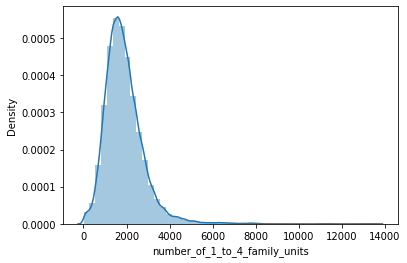

In [11]:
sns.distplot(df['number_of_1_to_4_family_units'])

In [12]:
df['number_of_1_to_4_family_units'].value_counts()

1638.0     105
1389.0     105
1737.0     104
1508.0     104
1387.0     103
          ... 
4643.0       1
4661.0       1
11274.0      1
9291.0       1
11334.0      1
Name: number_of_1_to_4_family_units, Length: 5951, dtype: int64

In [13]:
df = df.dropna()

In [14]:
df.shape

(137494, 22)

In [15]:
min_df = df[df['loan_type'] == 3 & (df['property_type'] == 1) & (df['loan_purpose'] == 1) & (df['co_applicant_True'] == 0) & (df['lender'] == 6240)]
min_df.drop('lender', axis=1, inplace=True)
min_df

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,applicant_race,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,accepted,co_applicant_True
76,1,1,1,1,427.0,3,249,10,186,2,5,1,92.0,4974.0,27.662,79696.0,100.000,1175.0,1354.0,1,0
200,1,1,1,1,179.0,3,163,2,55,1,5,1,186.0,6808.0,38.949,63826.0,100.000,856.0,522.0,1,0
221,1,1,1,1,213.0,3,102,22,123,2,5,1,55.0,6634.0,11.789,70142.0,100.000,2031.0,2681.0,1,0
460,1,1,1,1,338.0,3,139,3,299,2,5,1,89.0,4194.0,14.194,100783.0,100.000,1164.0,1557.0,1,0
477,1,1,1,1,69.0,3,399,26,57,2,6,2,64.0,2842.0,11.398,53603.0,100.000,979.0,1199.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156359,1,1,1,1,264.0,3,171,52,257,2,5,1,64.0,5731.0,16.494,76042.0,100.000,2089.0,2373.0,1,0
156659,1,1,1,1,115.0,3,385,22,11,2,5,1,77.0,4508.0,5.603,67845.0,93.562,1385.0,1463.0,1,0
156687,1,1,1,1,54.0,3,385,22,11,3,6,3,68.0,5056.0,4.140,71640.0,96.725,1837.0,2129.0,0,0
156976,1,1,1,1,1886.0,3,24,37,20,3,6,3,626.0,3762.0,43.856,62954.0,100.000,597.0,892.0,1,0


In [16]:
min_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1167 entries, 76 to 157021
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   loan_type                       1167 non-null   int64  
 1   property_type                   1167 non-null   int64  
 2   loan_purpose                    1167 non-null   int64  
 3   occupancy                       1167 non-null   int64  
 4   loan_amount                     1167 non-null   float64
 5   preapproval                     1167 non-null   int64  
 6   msa_md                          1167 non-null   int64  
 7   state_code                      1167 non-null   int64  
 8   county_code                     1167 non-null   int64  
 9   applicant_ethnicity             1167 non-null   int64  
 10  applicant_race                  1167 non-null   int64  
 11  applicant_sex                   1167 non-null   int64  
 12  applicant_income               

In [17]:
import matplotlib.pyplot as plt

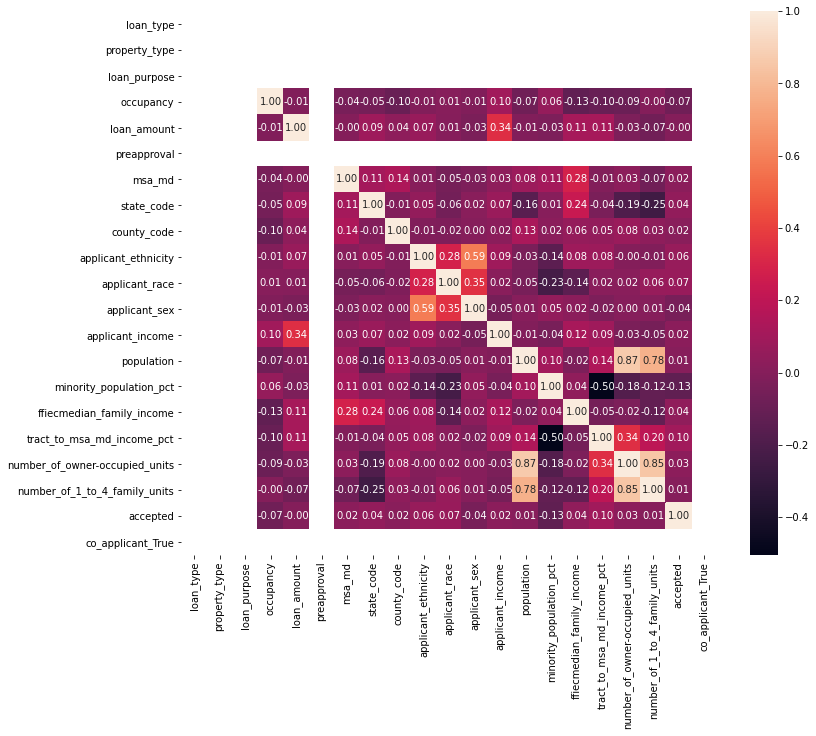

In [18]:
fig, ax = plt.subplots(figsize=(12,10)) 
sns.heatmap(min_df.corr(),annot=True, fmt='.2f')

In [19]:
#min_df = min_df[['applicant_ethnicity', 'applicant_race', 'applicant_sex', 'applicant_income', 'number_of_1_to_4_family_units', 'minority_population_pct', 'accepted']]

In [20]:
min_df.to_pickle(path='loan_df')

In [21]:
from google.colab import files
files.download('loan_df')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>